# Exercises

---

## Exercise 1: structured and ustructured images
Write a function that outputs the number of PC you have to choose to retain a given percentage of explained variance.
Use this funtion on the  handwritten digit data, and plot the number of PC needed to retain a certain fraction of EVR, for a few vaules of EVR.

Compare this curve to the one you can obtain in unstructured images: either generate images with the same shape of our data or randomly permute the pixels in each image independenlty. How does the number of PC needed to retain a certain fraction of the variance in this case compare to the number needed for digit images?

In [1]:
import numpy as np
from scipy import io
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pylab as plt

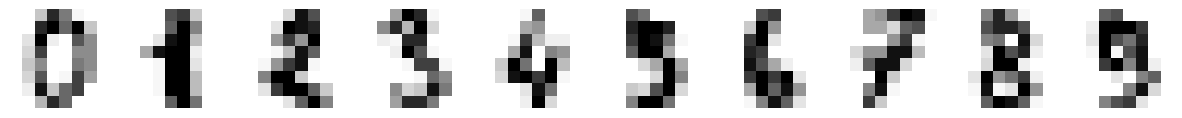

In [ ]:
dataset = load_digits()
images = dataset.data

plt.figure(figsize=(15,7))
for i,img in enumerate(images[:10]):
    plt.subplot(1,10,i+1)
    plt.imshow(img.reshape(8,8),cmap=plt.cm.Greys) # 8 x 8 pixel images
    plt.axis('off')

In [ ]:
scaler = StandardScaler()
pca = PCA()

# z-score with fit_transform method
X = scaler.fit_transform(images)
pca.fit(X)

print(type(pca.explained_variance_ratio_))
print(pca.explained_variance_ratio_.shape)
print(pca.explained_variance_ratio_[2])



<class 'numpy.ndarray'>
(64,)
0.08444414892624542


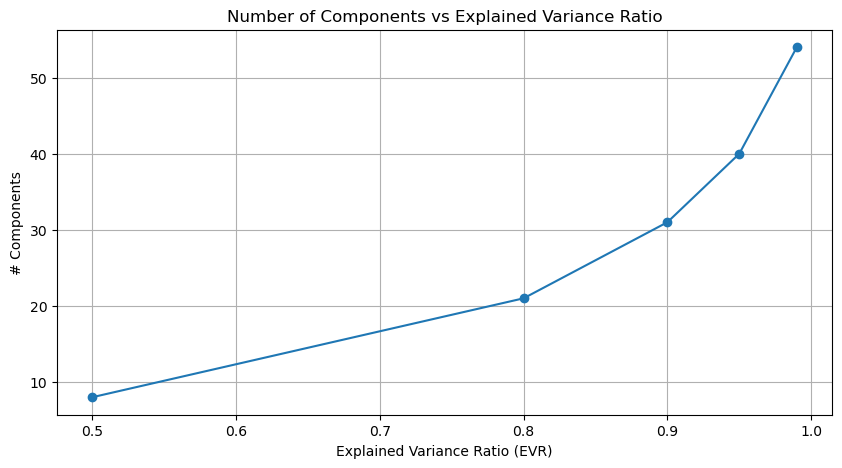

In [22]:
# EVR = 0.90
EVR_list = [0.50, 0.80, 0.90, 0.95, 0.99]

# Function to find the number of components needed to reach a given EVR
def find_n_components(data, EVR):
    # Define scaler and PCA objects
    scaler = StandardScaler()
    pca = PCA()

    X = scaler.fit_transform(data)
    pca.fit(X)

    cumsum = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(cumsum >= EVR) + 1
    return n_components

comp_list = [find_n_components(images, EVR) for EVR in EVR_list]

plt.figure(figsize=(10, 5))
plt.plot(EVR_list, comp_list, marker='o')
plt.title('Number of Components vs Explained Variance Ratio')
plt.xlabel('Explained Variance Ratio (EVR)')
plt.ylabel('# Components')
plt.grid()

## Exercise 2: cortical dynamics

Work with the cortical data we used in the lesson. Write some code that lets you easily chose a specific behavioural event from the `trial_data` dictionary (the recorded events are `CSp` for positive conditioned stimulus, `CSn` for negative conditioned stimulus and `licks` for lick events), one of the principal components, an onset time and and offset time, and plots the timecourse of this component in the selected period around the chosen event type.

Use this code to explore the data: how do different components behave? Do you notice any patterns? How would you test for the statistical significance of the effects that you see (if any)?

## Exercise 3: nonlinear dimensionality reduction

Using the MNIST digit dataset, explore the effect of hyperparameters on the result of nonlinear dimensionality reduction methods.

- Change the `perplexity` and `exageration` parameters in `TNSE` (one at a time). Graphically compare the results of different values.
- Change the neighbourhood size in `Isomap` (set by the parameter `n_neighbors`), and visualize how the results change.

Finally, try to apply one or more of these methods to the cortical data we used in the lessons. How do the data look in two dimensions? Do any cluster seem to appear? Are they robust with respect to hyperparameter choice?